In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset_train = pd.read_csv('./Dataset/Google_Stock_Price_Train.csv')

In [11]:
training_set = dataset_train.iloc[:,1:2].values

In [13]:
len(training_set)

1258

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1)) #feature range will be used to scale all the stock price in between 0 and 1

training_set_scaled = sc.fit_transform(training_set)

In [14]:
#creating 60 timestamps and 1 output 1
X_train = []
y_train = []
for i in range(60,len(training_set)):
    X_train.append(training_set_scaled[i-60:i ,0])
    y_train.append(training_set_scaled[i, 0])

X_train , y_train = np.array(X_train),np.array(y_train) 

In [17]:
X_train.shape , y_train.shape

((1198, 60), (1198,))

In [36]:
X_train = np.reshape(X_train , (X_train.shape[0] ,X_train.shape[1] , 1))

# Part 2 -- Building The RNN

In [37]:
from keras.models import Sequential
from keras.layers import LSTM , Dropout , Dense

In [38]:
regressor = Sequential()
print('-'*170)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


LSTM(units , return_sequences , input_dimensions)

units - basically represents number of neurons.
return_sequences - if you have stacked LSTM layers the you have to keep it TRUE and if have no more LSTM layers then keep FALSE (by default it is FALSE)
input_dimensions = it take the dimensions (timestamps , indicators) , it doesn't take the number of rows in account beacuse it deal with that automatically.

Dropout = how much amount of neurons you want to dropout during FF and Backprop.
rate = 0.2 (represents the 20% of total nuerons in that layer will not be used during training .) 

In [39]:
# adding the LSTM layers and the dropout layer
regressor.add(LSTM(units = 50 , return_sequences = True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(rate = 0.2))

# adding the second layer of LSTM and DROupout
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# adding the third layer of LSTM with 20% dropouts
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(rate = 0.2))

# adding the Fourth layer of the LSTM with 20% dropouts
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(rate = 0.2))

In [40]:
regressor.add(Dense(units = 1))

In [41]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [42]:
regressor.fit(X_train , y_train , epochs = 100 , batch_size = 32)

Epoch 1/100
38/38 [==============================] - 20s 97ms/step - loss: 0.0940
Epoch 2/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0056
Epoch 9/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0039
Epoch 13/100


# Part 3-- Predictions

In [44]:
dataset_test = pd.read_csv('./Dataset/Google_Stock_Price_Test.csv')


In [45]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [53]:
test_set = dataset_test.iloc[: , 1:2]

In [54]:
dataset_total = pd.concat((dataset_train['Open'] , dataset_test['Open']) , axis = 0)

In [55]:
# taking only the last 60 prediction values from 1 Jan,2017 and converting inot the numpy
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values

In [56]:
inputs.shape

(80,)

In [57]:
inputs = inputs.reshape(-1,1)

In [59]:
inputs.shape

(80, 1)

In [60]:
inputs = sc.transform(inputs)

In [61]:
X_test = []
for i in range(60 , 80):
    X_test.append(inputs[i-60 : i ,0])
    

In [62]:
X_test = np.array(X_test)

In [63]:
X_test.shape

(20, 60)

In [68]:
X_test = np.reshape(X_test,(X_test.shape[0] , X_test.shape[1],1))

In [69]:
predicted_stock_price = regressor.predict(X_test)

In [70]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

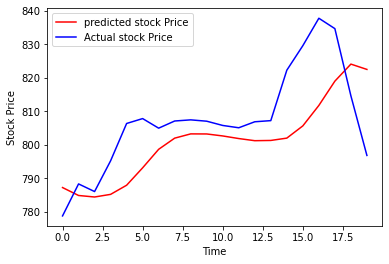

In [71]:
plt.plot(predicted_stock_price , color = 'red' , label = 'predicted stock Price')
plt.plot(test_set , color = 'Blue' , label = 'Actual stock Price')
plt.xlabel("Time")
plt.ylabel('Stock Price')
plt.legend()
plt.show()